# Domain-Education 

### Improving student performance prediction helps institutions intervene early.
### Data-driven solutions can guide policy and teaching strategies.
### Student performance datasets are widely available, making it easier to experiment, build models, and validate outcomes.
### Educational Data Mining (EDM) and Learning Analytics are rapidly expanding fields, bridging AI, statistics, and education.

# Objective of the Study


## Predict Student Performance
Identify how attendance, study hours, socio-economic background, and teaching style influence final grades.

## Analyze Study Habits
Understand the impact of study time, online vs traditional learning modes, and preparation methods on academic outcomes.

## Evaluate Extracurricular Activities
Assess the effect of participation in sports, arts, and clubs on academic performance.

## Examine Gender Gap
Compare performance differences between male and female students to highlight inequalities in education.

# Data Pipeline for Student Performance & Learning Outcomes

Data Collection
Data Preprocessing 
Exploratory Data Analysis (EDA)
Visualization  
Data Splitting
Modeling & Prediction (ML Models)
Model Evaluation & Interpretation
Dashboard (Power BI)

# Data Collection

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("student_performance_updated_1000.csv")

In [3]:
print("Dataset Shape:")
print(df.shape)

Dataset Shape:
(1000, 12)


In [6]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [7]:
print("\nFirst few rows of the dataset:")
df.head()


First few rows of the dataset:


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [9]:
print("\nBasic statistics of numerical columns:")
df.describe()


Basic statistics of numerical columns:


,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%)
count,960.000000,960.000000,950.000000,967.000000,957.000000,960.000000,976.000000,959.000000
mean,5416.019792,85.510417,17.630526,77.598759,1.520376,80.030208,2.406967,77.248175
std,2653.748319,7.332125,6.272132,10.006640,1.046439,9.493652,1.620267,19.298148
min,1.000000,70.000000,8.000000,60.000000,0.000000,62.000000,-5.000000,50.000000
25%,3113.500000,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,63.000000
50%,5396.500000,88.000000,18.000000,78.000000,1.000000,80.000000,2.500000,76.000000
75%,7754.750000,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,89.000000
max,9998.000000,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,200.000000


# Data Cleaning and Preprocessing

In [10]:
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

In [11]:
# Handle missing values
# For numerical columns, fill with median
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [12]:
# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19256\1758698585.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [13]:
print("\nMissing values after handling:")
df.isnull().sum()


Missing values after handling:


StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Study Hours                  0
Attendance (%)               0
Online Classes Taken         0
dtype: int64

# Exploratory Data Analysis (EDA)

In [56]:
df.to_csv("student_performance.csv", index=False)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade', 'Study Hours', 'Attendance (%)', 'Online Classes Taken'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

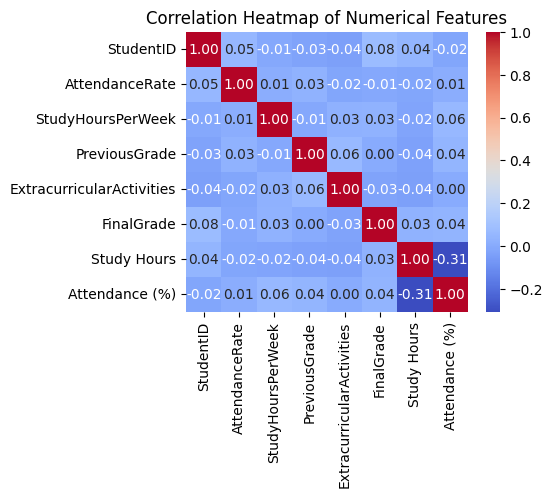

In [23]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))  
plt.subplot(2, 2, 1)
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')

Text(0.5, 1.0, 'Study Hours vs Final Grade')

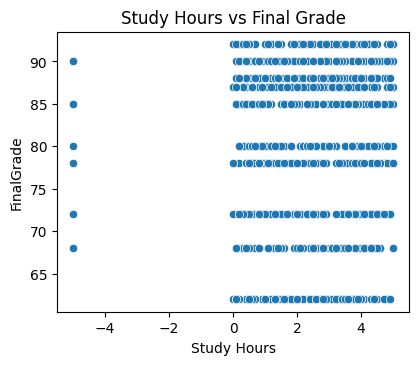

In [26]:
# Study Hours vs Final Grade
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Study Hours', y='FinalGrade')
plt.title('Study Hours vs Final Grade')


Text(0.5, 1.0, 'Attendance Rate vs Final Grade')

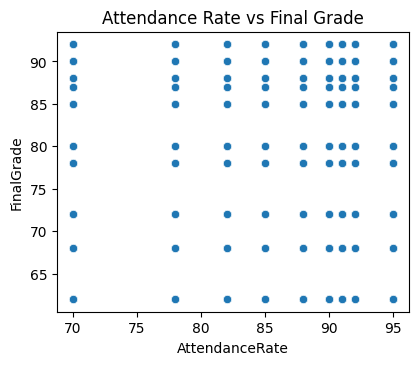

In [27]:
# Attendance Rate vs Final Grade
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='AttendanceRate', y='FinalGrade')
plt.title('Attendance Rate vs Final Grade')

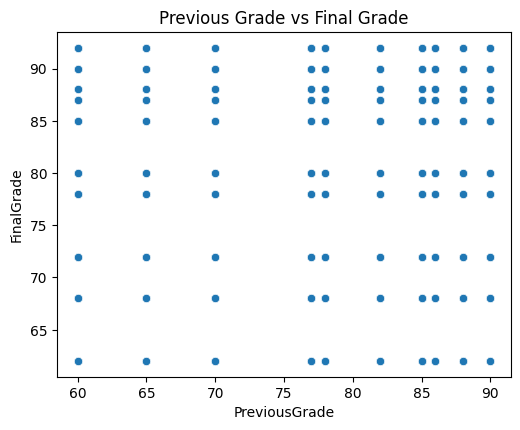

In [29]:
# Previous Grade vs Final Grade
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='PreviousGrade', y='FinalGrade')
plt.title('Previous Grade vs Final Grade')

plt.tight_layout()
plt.show()

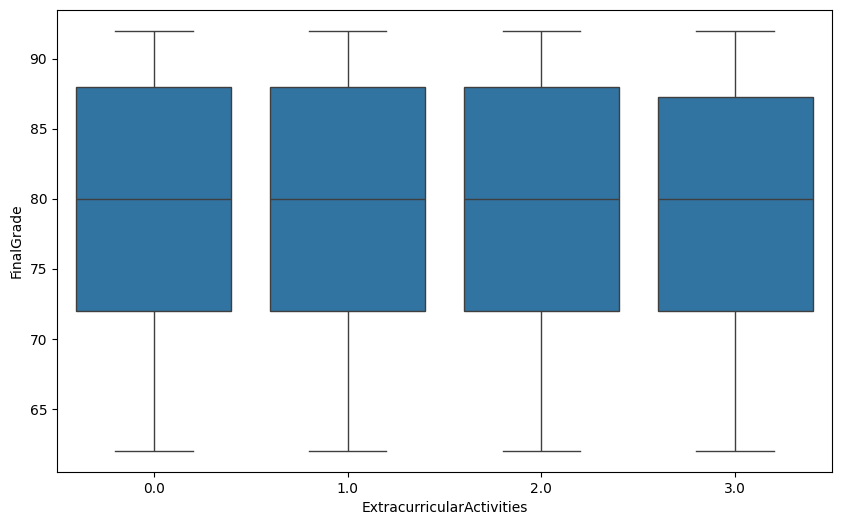

In [37]:
# # Distribution of Final Grades by Extracurricular Activities
plt.figure(figsize=(10, 6))
sns.boxplot(x="ExtracurricularActivities", y="FinalGrade", data=df)
plt.show()


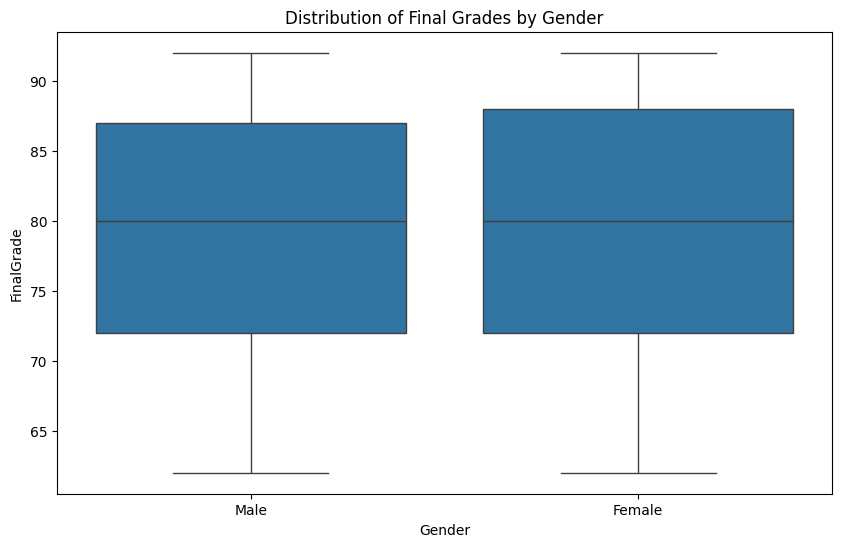

In [34]:
# Distribution of Final Grades by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='FinalGrade')
plt.title('Distribution of Final Grades by Gender')
plt.show()

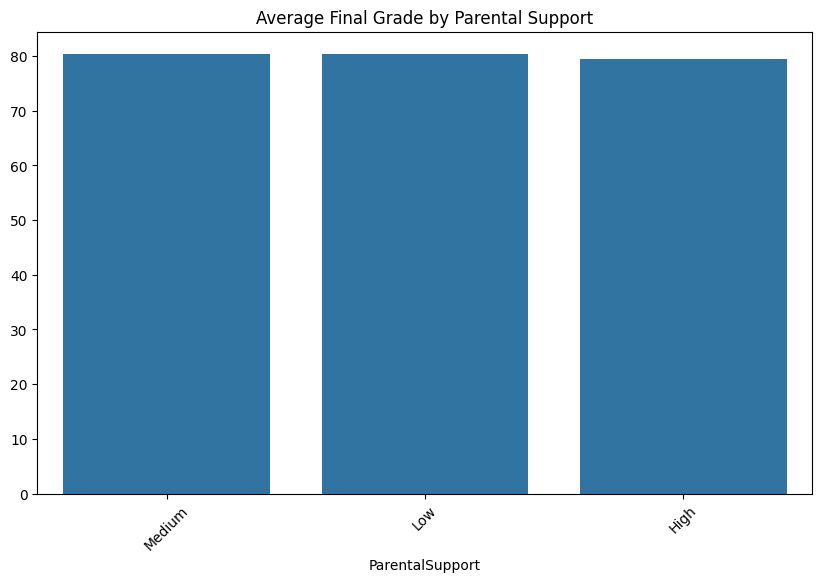

In [33]:
# Average Final Grade by Parental Support
plt.figure(figsize=(10, 6))
avg_grade_by_support = df.groupby('ParentalSupport')['FinalGrade'].mean().sort_values(ascending=False)
sns.barplot(x=avg_grade_by_support.index, y=avg_grade_by_support.values)
plt.title('Average Final Grade by Parental Support')
plt.xticks(rotation=45)
plt.show()

# Machine Learning Models

In [ ]:
"""
Selected Features for Prediction:

Study Hours
Attendance Rate
Previous Grade
Extracurricular Activities
"""

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
#  features and target
features = ['Study Hours', 'AttendanceRate', 'PreviousGrade', 'ExtracurricularActivities']
X = df[features]
y = df['FinalGrade']

In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Train multiple models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [43]:
# Train and evaluate models
results = {}
for name, model in models.items():
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'RMSE': np.sqrt(mse),
        'R2': r2
    }


In [46]:
# Display results
results_df = pd.DataFrame(results)
results_df

,Linear Regression,Decision Tree,Random Forest
MSE,89.524615,189.145000,110.025250
RMSE,9.461745,13.753000,10.489292
R2,0.003004,-1.106424,-0.225302


In [47]:
# Plot actual vs predicted for the best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

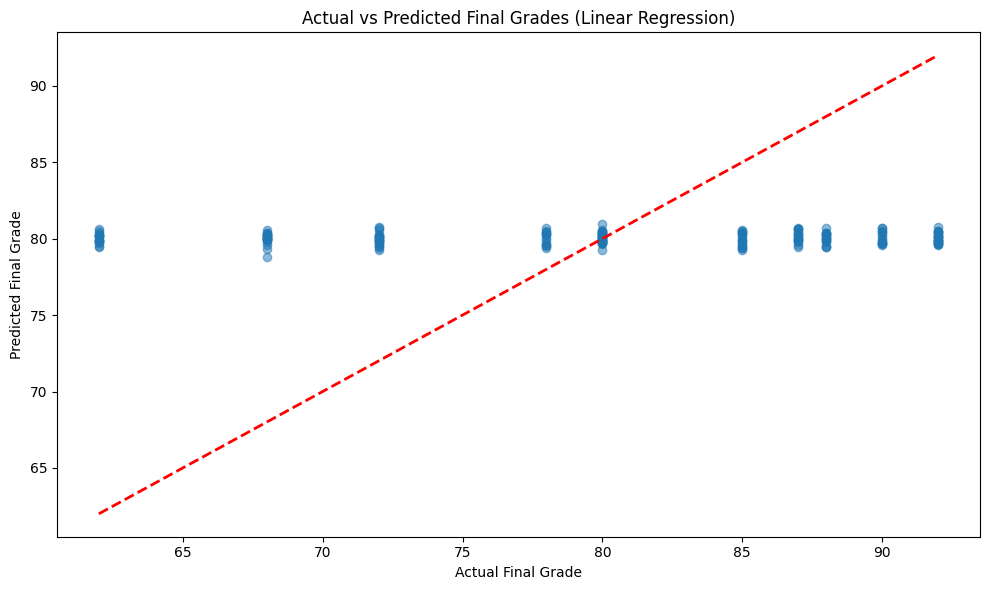

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title(f'Actual vs Predicted Final Grades ({best_model_name})')
plt.tight_layout()
plt.show()

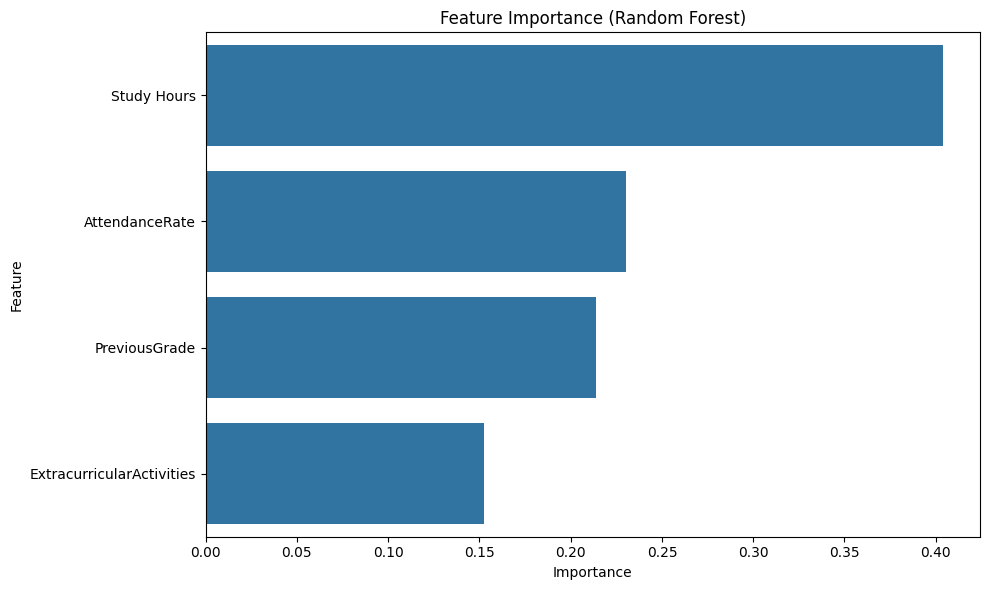

In [49]:
# Feature importance for Random Forest
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance, x='Importance', y='Feature')
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.show()

# Model Save

In [50]:
import joblib

best_model = models['Linear Regression']
joblib.dump(best_model, 'model.pkl')

# Save the scaler as well for future predictions
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler have been saved successfully!")

Model and scaler have been saved successfully!


In [55]:
# Example for prediction
sample_student = pd.DataFrame([[0,45, 40, 0]], columns=features)
sample_scaled = scaler.transform(sample_student)
predicted_grade = best_model.predict(sample_scaled)[0]

print("\nPrediction:")
print("\n")
print(f"Student with:")
print(f"- Study Hours: {sample_student['Study Hours'][0]}")
print(f"- Attendance Rate: {sample_student['AttendanceRate'][0]}%")
print(f"- Previous Grade: {sample_student['PreviousGrade'][0]}")
print(f"- Extracurricular Activities: {'Yes' if sample_student['ExtracurricularActivities'][0] == 1 else 'No'} (1)")
print(f"\nPredicted Final Grade: {predicted_grade:.2f}")



Prediction:


Student with:
- Study Hours: 0
- Attendance Rate: 45%
- Previous Grade: 40
- Extracurricular Activities: No (1)

Predicted Final Grade: 79.78
